#THE SPARKS FOUNDATION_INTERNSHIP
(Data Science and Business Analytics)

## TASK - Prediction using Supervised ML
### To Predict the percentage of an student based on the number of study hours

## AUTHOR- TRUPTI U RATHOD

## Step 1 - Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict


## Step 2 - Load the dataset in .csv

In [ ]:
data = pd.read_csv("student_scores.csv")
data.head(15)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 - Check for null values

In [ ]:
if data.isnull().values.any():
    print("There are null values in the dataset.")
else:
    print("No null values in the dataset.")

No null values in the dataset.


## Step 4 - Data visualization

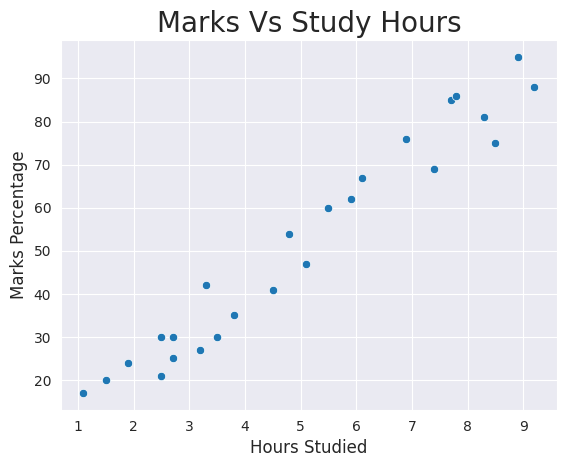

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Marks Vs Study Hours', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

 ## Step *5* - Training the Model:
1) Splitting the data

In [ ]:
# Split the data into features (X) and the target variable (y)
X = data[['Hours']]
y = data['Scores']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
print("---------- Model Trained ----------")

---------- Model Trained ----------


## Step 7 - Predicting the Percentage of Marks

In [ ]:
# Make predictions on the test data
y_pred = regression.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Step 8 -Comparing the Predicted Marks with the Actual Marks

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
print(compare_scores)

    Actual Marks  Predicted Marks
5             20        90.901468
2             27       132.779798
19            69       236.243907
16            30       115.535779
11            62       199.292440


## Step 9 - Visually Comparing the Predicted Marks with the Actual Marks

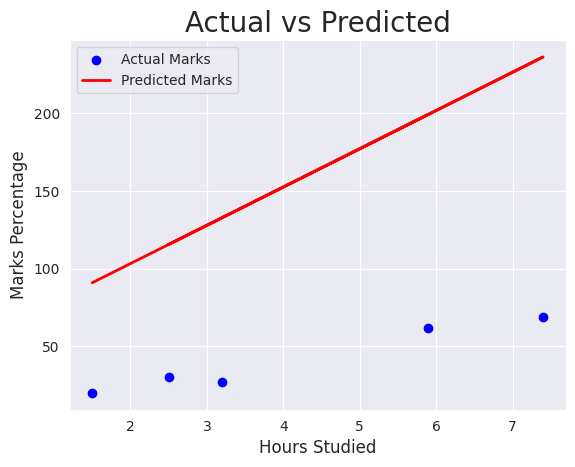

In [ ]:
# Create a scatter plot to compare actual marks and predicted marks
plt.scatter(X_test, y_test, color='blue', label='Actual Marks')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Marks')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.legend()
plt.show()


##Step 10 - Model evaluation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 113.35067836028304
Mean Squared Error: 14070.498359455185
Root Mean Squared Error: 118.61913150691664
R-squared: -34.51004027724406


In [ ]:
# Cross-validation
cv_scores = cross_val_score(regression, X, y, cv=5)
cv_predictions = cross_val_predict(regression, X, y, cv=5)

## Step 12: Visualize the regression line

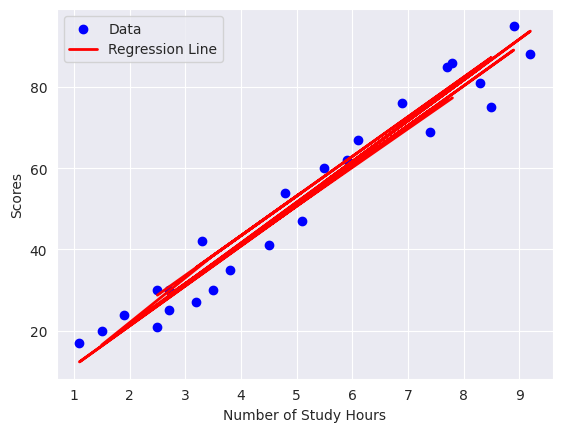

In [ ]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, cv_predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Number of Study Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

## Step 6 - Residual plot -  crucial step in assessing the performance of a regression model

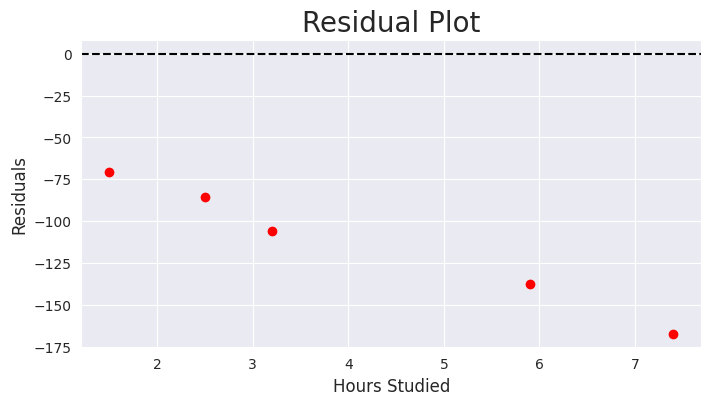

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(X_test, residuals, c='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot', size=20)
plt.ylabel('Residuals', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Step 11 - Predicting the score for 9.25 hours of study

In [ ]:
hours = [[9.25]]
predicted_score = regression.predict(scaler.transform(hours))
print(f"Predicted Score for 9.25 hours of study: {predicted_score[0]:.2f}")

Predicted Score for 9.25 hours of study: 93.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### **According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**